In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from skimage.filters import threshold_multiotsu

# Morphology

- Morphological operations are image processing techniques that probe and transform the shapes within binary or grayscale images using a small matrix called a **structuring element** or **kernel**.  
- The two fundamental morphological operations are **erosion**, which shrinks foreground objects by eroding their boundaries, and **dilation**, which expands objects by adding pixels to their edges.  
- Combining erosion and dilation leads to compound operations like **opening** (erosion followed by dilation) that removes small noise, and **closing** (dilation followed by erosion) that fills small holes and gaps.  
- Other useful morphological transformations include **morphological gradient** (highlighting object edges), **top hat** (extracting bright regions on dark backgrounds), and **black hat** (extracting dark regions on bright backgrounds), which are often applied to grayscale images for feature extractio

Erosion
---
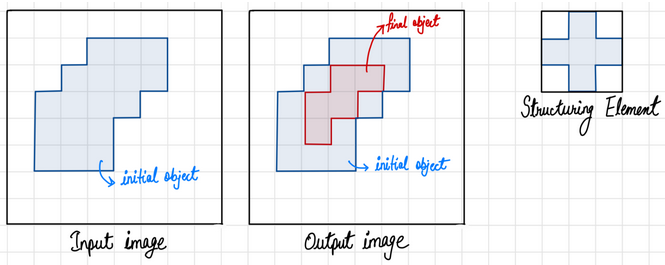

Dilation
---
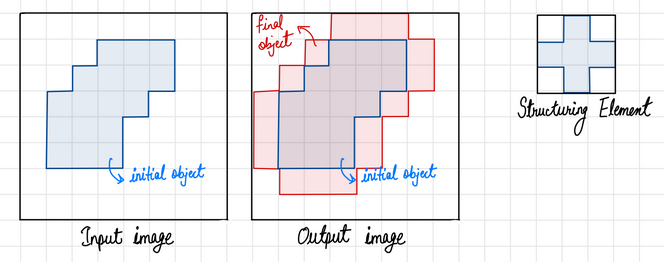

## Structuring element

- It acts as a probe that slides over the image, comparing its shape with the underlying pixels to determine how the pixel values should be transformed.

- The center pixel of the structuring element, called the origin, identifies the pixel in the image currently being processed.

- Structuring elements can be flat (binary masks of 1s and 0s) or nonflat (with weighted values), and their shape and size influence how morphological operations affect the image.

- Common shapes include squares, disks (circles), crosses, and ellipses, chosen based on the features or objects to be processed.

- The size of the structuring element determines the scale of neighborhood considered, affecting both the extent and speed of morphological transformations.


## Erosion operation


- Erosion is a morphological operation that shrinks the boundaries of foreground objects by removing pixels on their edges, effectively reducing the size of shapes in a binary or grayscale image.

- It uses a structuring element (kernel) to probe the image, and a pixel in the output image is kept only if the structuring element fits entirely within the foreground region of the input image at that pixel location.
- Acts like 'and'
- 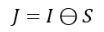

- Same shape elements become a single pixel
- Smaller shapes get removed
- Removing borders
- Making holes of shapes bigger

### Applications

#### Disconnection of objects hence counting them

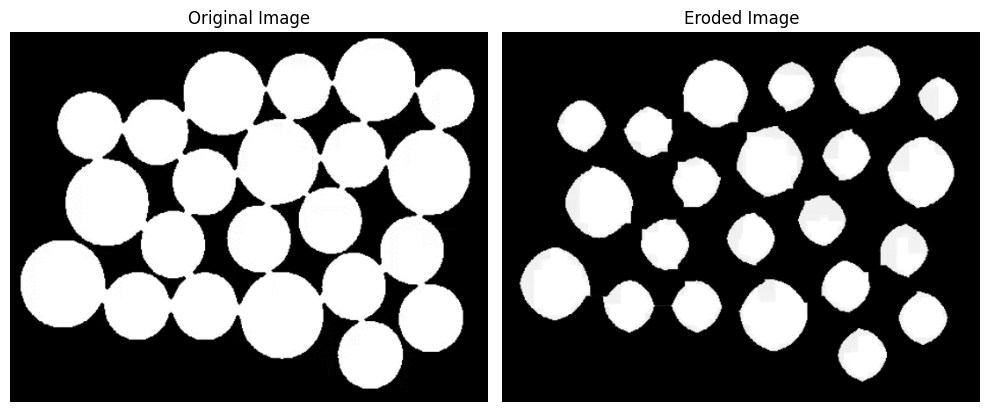

In [5]:

img = cv2.imread('connected-circles.png', cv2.IMREAD_GRAYSCALE)
assert img is not None, "Image not found (check path: connected-circles.png)"

# structuring element a 17 x 17 square
kernel = np.ones((17, 17), np.uint8)

# erosion
eroded_img = cv2.erode(img, kernel, iterations=1)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded_img, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.tight_layout()
plt.show()



#### Removing noise

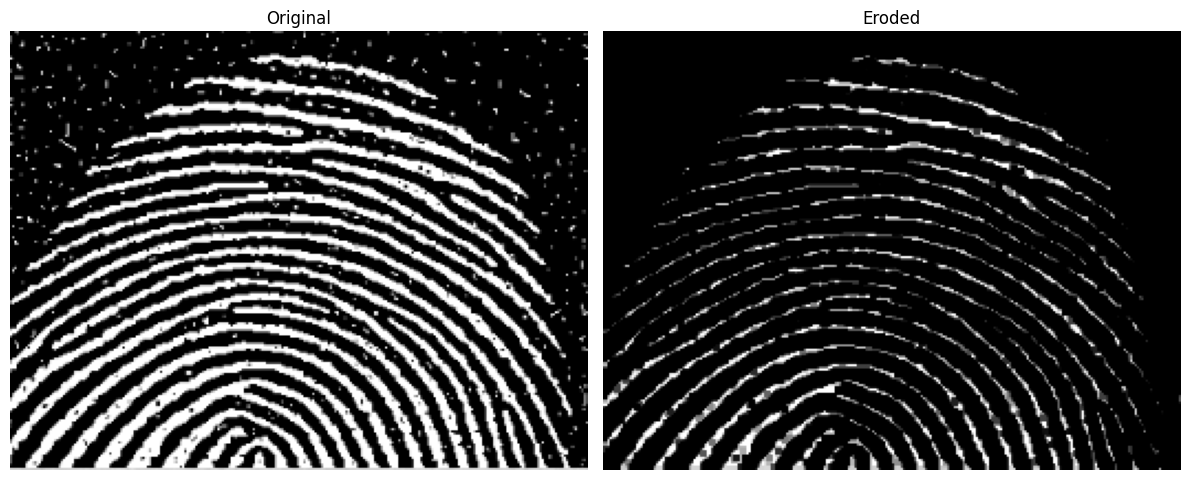

In [6]:

img = cv2.imread('noise-fingerprint.png', cv2.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

# structuring element for erosion
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

# erode the image
eroded = cv2.erode(img, kernel, iterations=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded')
plt.axis('off')

plt.tight_layout()
plt.show()


## Dilation operation


- Dilation is a morphological operation that expands the boundaries of foreground objects in an image by adding pixels to their edges based on a structuring element, effectively growing the size of objects and filling small holes or gaps.

- It works by sliding the structuring element over the image and setting the output pixel to the maximum value covered by the structuring element’s neighborhood, which causes objects to become thicker and more connected.
- 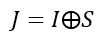
- Acts like 'or'
- Replaces 1 single pixel with the struct
- Adding borders
- Making holes of shapes smaller

### Applications

#### Connection of objects

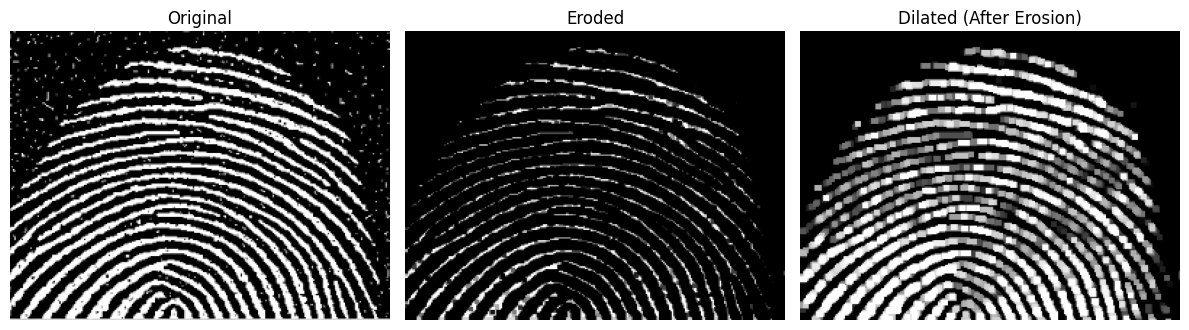

In [7]:
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (2, 2))
dilated = cv2.dilate(eroded, kernel2, iterations=3)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title('Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(eroded, cmap='gray')
plt.title('Eroded')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(dilated, cmap='gray')
plt.title('Dilated (After Erosion)')
plt.axis('off')

plt.tight_layout()
plt.show()


#### Filling inner holes of objects

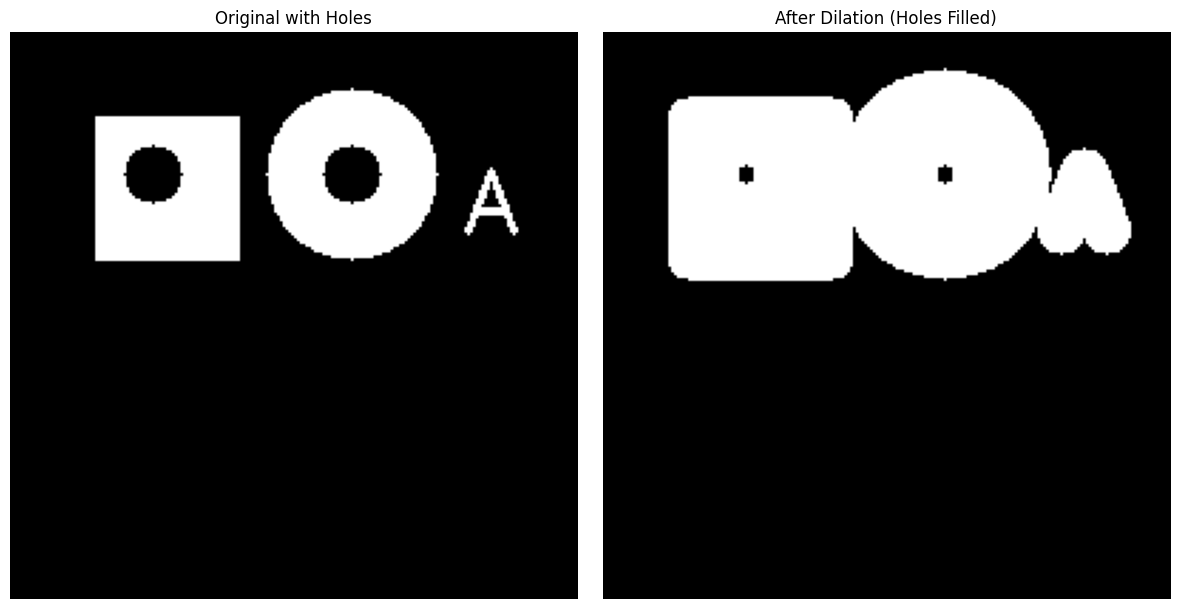

In [8]:

img = np.zeros((200, 200), dtype=np.uint8)  # Black background

cv2.rectangle(img, (30, 30), (80, 80), 255, -1)  # White rectangle
cv2.circle(img, (120, 50), 30, 255, -1)  # White circle
cv2.putText(img, 'A', (160, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, 255, 2)  # White letter

cv2.circle(img, (50, 50), 10, 0, -1)  # Hole in rectangle
cv2.circle(img, (120, 50), 10, 0, -1)  # Hole in circle

kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
dilated = cv2.dilate(img, kernel, iterations=1)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.title('Original with Holes')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(dilated, cmap='gray', vmin=0, vmax=255)
plt.title('After Dilation (Holes Filled)')
plt.axis('off')

plt.tight_layout()
plt.show()


## Openning **operation**
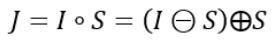

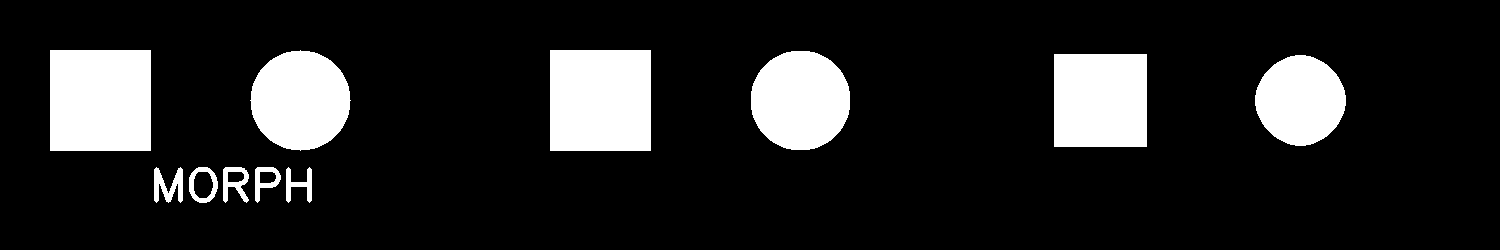

Left: Original | Middle: Dilated | Right: Eroded

Images saved: 'original.png', 'dilated.png', 'eroded.png'


In [9]:

width, height = 500, 250
image = np.zeros((height, width), dtype=np.uint8)

cv2.rectangle(image, (50, 50), (150, 150), 255, -1)  # Filled square
cv2.circle(image, (300, 100), 50, 255, -1)  # Filled circle
cv2.putText(image, "MORPH", (150, 200), cv2.FONT_HERSHEY_SIMPLEX, 1.5, 255, 3)  # Text

kernel = np.ones((9,9), np.uint8)

# Erosion
eroded = cv2.erode(image, kernel, iterations=1)

# Dilation
dilated = cv2.dilate(eroded, kernel, iterations=1)



combined = np.hstack((image, dilated, eroded))
cv2_imshow(combined)

print("Left: Original | Middle: Dilated | Right: Eroded")

cv2.imwrite("original.png", image)
cv2.imwrite("dilated.png", dilated)
cv2.imwrite("eroded.png", eroded)
print("\nImages saved: 'original.png', 'dilated.png', 'eroded.png'")

## Closing Operation
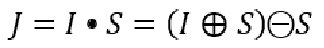

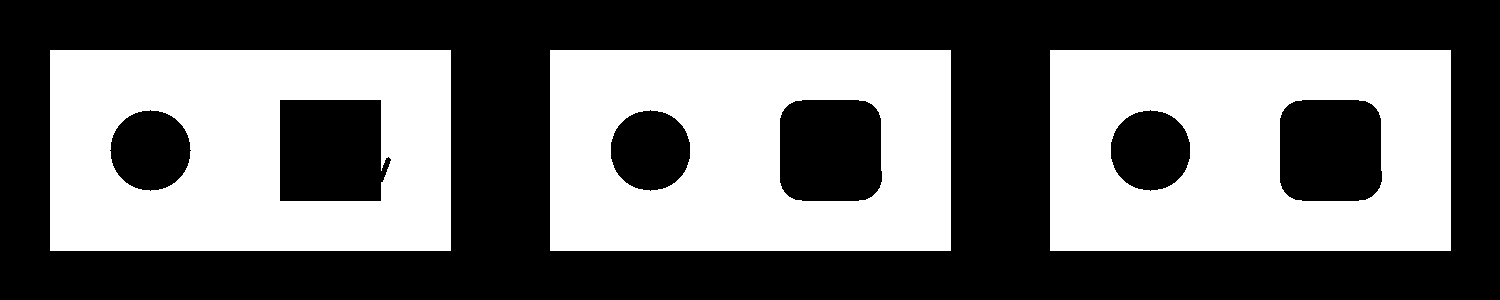

Left: Original | Middle: Manual Closing | Right: cv2.morphologyEx Closing


In [10]:


img = np.zeros((300, 500), dtype=np.uint8)  # Black canvas
cv2.rectangle(img, (50, 50), (450, 250), 255, -1)  # White rectangle

cv2.circle(img, (150, 150), 40, 0, -1)       # Circular hole
cv2.rectangle(img, (280, 100), (380, 200), 0, -1)  # Square hole
cv2.putText(img, "CV", (350, 180), cv2.FONT_HERSHEY_SIMPLEX, 1, 0, 3)  # Text hole

kernel_size = 45  # larger than largest hole
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))

# Manual closing (dilation then erosion)
dilated = cv2.dilate(img, kernel, iterations=1)
closed_manual = cv2.erode(dilated, kernel, iterations=1)

# Built-in closing function
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

display_img = np.hstack((img, closed_manual, closed))
cv2_imshow(display_img)
print("Left: Original | Middle: Manual Closing | Right: cv2.morphologyEx Closing")
